In [17]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

# How to open and read different files

### The FITS file

In [18]:
# open the file
data = fits.open('/Users/natachaupra/Downloads/manga-7964-12702-LOGCUBE.fits.gz')

# I changed this data to the one that you ramdomly chose to play with 

In [19]:
mangaid = data[0].header['MANGAID'] # I saved the mangaid in a variable for easy access
plateifu = data[0].header['PLATEIFU'] # Same for plateifu

In [20]:
# To get the info of all subfiles that is in the fits file of each object

# data.info() 

In [21]:
# To get the information about the object you are using 

# data[0].header

# focus on the RA, Dec, plateifu, mangaid, bunit

<!-- 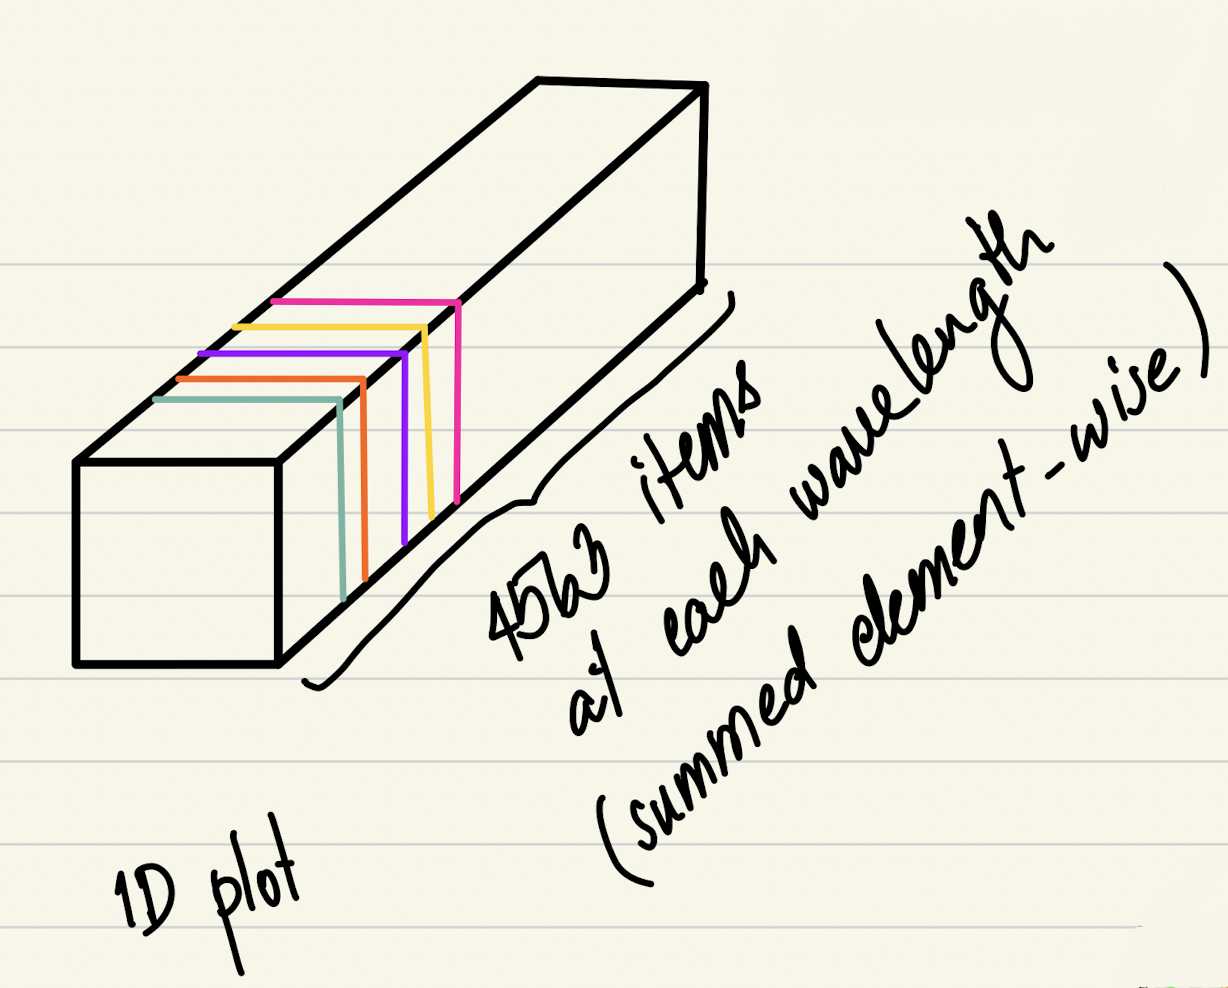 -->
<div>
    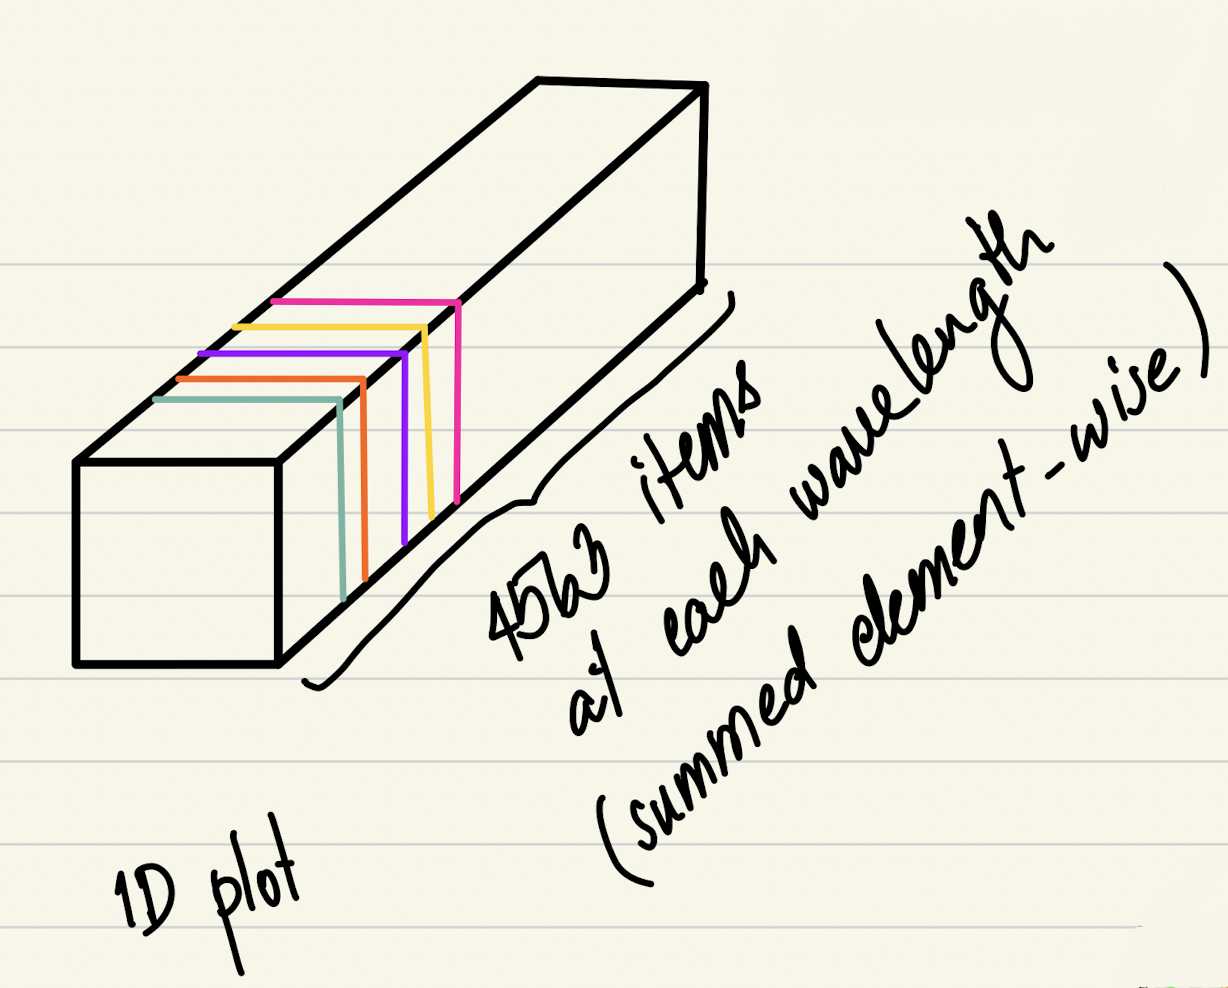
</div>

In [22]:
# how to open each subfile. Just copy this code

flux = np.transpose(data['FLUX'].data, axes=(2, 1, 0))
ivar = np.transpose(data['IVAR'].data, axes=(2, 1, 0))
mask = np.transpose(data['MASK'].data, axes=(2, 1, 0))
wave = data['WAVE'].data

In [23]:
# flux = [x][y][wavelength] --> value of flux density at any point (x,y) at a certain wavelength
# x = y
# wavelength = 4563

print('Information below is for this particular object only')
print('length of the x dimension =', len(flux))
print('length of the y dimension =', len(flux[0]))
print('length of the wavelength (depth) dimension =', len(flux[0][0]))

Information below is for this particular object only
length of the x dimension = 74
length of the y dimension = 74
length of the wavelength (depth) dimension = 4563


In [24]:
flux[0][0] # example of flux density array at pixel (0,0) for each wavelength. It is a 1D array, 4563 items long

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [25]:
# Example of how to add arrays element-wise, using numpy array
a = np.array([1,2,3])
b = np.array([4,5,6])
a+b

array([5, 7, 9])

In [26]:
wave # file containing all the observed wavelengths in the observed frame; 4563 items long

array([ 3621.59598486,  3622.42998417,  3623.26417553, ...,
       10349.03843826, 10351.42166679, 10353.80544415])

### The DRP file

In [27]:
drp_data = fits.open('/Users/natachaupra/Downloads/drpall-v3_1_1.fits')
# drp data containing the information about the object

In [28]:
drp_data.info() #information in drp data

Filename: /Users/natachaupra/Downloads/drpall-v3_1_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  MANGA         1 BinTableHDU    209   11273R x 99C   [K, 32A, 32A, 32A, 32A, 32A, 32A, 32A, 32A, 32A, 32A, D, D, D, D, D, D, D, K, D, K, D, D, 53A, K, 32A, K, D, D, D, D, D, D, D, D, D, D, D, K, K, K, D, D, D, D, K, K, K, K, 32A, K, 19A, K, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, K, 6A, K, K, D, D, 7D, 7D, 7D, D, D, D, D, 7D, D, D, 7D, 7D, 7D, 7D, D, D, D, D, 7D, 7D]   
  2  MASTAR        1 BinTableHDU    209   35394R x 99C   [K, 32A, 32A, 32A, 32A, 32A, 32A, 32A, 32A, 32A, 32A, D, D, D, D, D, D, D, K, D, K, D, D, 53A, K, 32A, K, D, D, D, D, D, D, D, D, D, D, D, K, K, K, D, D, D, D, K, K, K, K, 32A, K, 19A, K, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, K, 6A, K, K, D, D, 7D, 7D, 7D, D, D, D, D, 7D, D, D, 7D, 7D, 7D, 7D, D, D, D, D, 7D, 7D]   


In [29]:
#information in the second subfile in drp data. Focus on nsa_z for redshift.

# drp_data[1].header 

In [30]:
# np.where to get the index of the object with the mangaid that we want.
drp_index = np.where(drp_data[1].data['mangaid'] == mangaid) 
print(f'index of object with mangaid {mangaid} in drp file (using mangaid) =', drp_index[0][0])

# you can also get index using plateifu
plateifu_index = np.where(drp_data[1].data['plateifu'] == plateifu)
print(f'index of object with mangaid {mangaid} in drp file (using plateifu) =', plateifu_index[0][0])

# using the index we found, we can call the drp with that index and get the redshift of the object
drp_redshift = drp_data[1].data[drp_index[0][0]]['nsa_z']
print(f'Redshift of object with mangaid {mangaid} in drp file =', drp_redshift)

index of object with mangaid 1-179139 in drp file (using mangaid) = 4505
index of object with mangaid 1-179139 in drp file (using plateifu) = 4505
Redshift of object with mangaid 1-179139 in drp file = 0.0795422


### The DAP file

I forgot that your DAP will be fits and not csv like mine so I have updated the code below.

You can actually ignore this bit and see the next part 

In [31]:
df = pd.read_csv('/Users/natachaupra/Desktop/Snr_Prj/Snr-Prj/DAP.csv', sep=',')

In [32]:
# If you want to see the whole dataframe, just run this cell. It's very long tho

# pd.set_option("display.max_rows", None)
# df

In [33]:
# To get all the information about the object, just call it using the mangaid
df.loc[df['mangaid'] == '1-43214']

plate  ifudesign   plateifu  mangaid  drpallindx  mode            daptype  \
30   8135       1902  8135-1902  1-43214        4571  CUBE  HYB10-GAU-MILESHC   

    dapdone       objra     objdec  ...  specindex_1re_cah1  \
30     True  114.096382  39.438278  ...           -0.017145   

    specindex_1re_cah2  specindex_1re_naisdss  specindex_1re_tio2sdss  \
30            0.248986               0.425967                0.075008   

    specindex_1re_d4000  specindex_1re_dn4000  specindex_1re_tiocvd   sfr_1re  \
30             0.877356              0.896188              0.995518  6.891536   

     sfr_tot           htmID  
30  27.41525  16283386537540  

[1 rows x 620 columns]

In [34]:
# Or call it using plateifu
df.loc[df['plateifu'] == '8135-1902']

plate  ifudesign   plateifu  mangaid  drpallindx  mode            daptype  \
30   8135       1902  8135-1902  1-43214        4571  CUBE  HYB10-GAU-MILESHC   

    dapdone       objra     objdec  ...  specindex_1re_cah1  \
30     True  114.096382  39.438278  ...           -0.017145   

    specindex_1re_cah2  specindex_1re_naisdss  specindex_1re_tio2sdss  \
30            0.248986               0.425967                0.075008   

    specindex_1re_d4000  specindex_1re_dn4000  specindex_1re_tiocvd   sfr_1re  \
30             0.877356              0.896188              0.995518  6.891536   

     sfr_tot           htmID  
30  27.41525  16283386537540  

[1 rows x 620 columns]

In [35]:
# The dataframe is 620 columns wide so not everything maybe displayed. You can just call the things you want
# For example, redhsift
df.loc[df['mangaid'] == '1-43214']['nsa_z']

30    0.117997
Name: nsa_z, dtype: float64

### Updated DAP

In [36]:
dap = fits.open('/Users/natachaupra/Downloads/dapall-v3_1_1-3.1.0.fits')

In [37]:
z_index = np.where(dap[1].data['mangaid'] == mangaid)[0][0] # I compared with the mangaid variable I made above.
z_index

3227

In [38]:
redshift = dap[1].data['nsa_z'][z_index]

# How to plot stuff

### Central Spectrum

You can just copy the code below :)

37 37


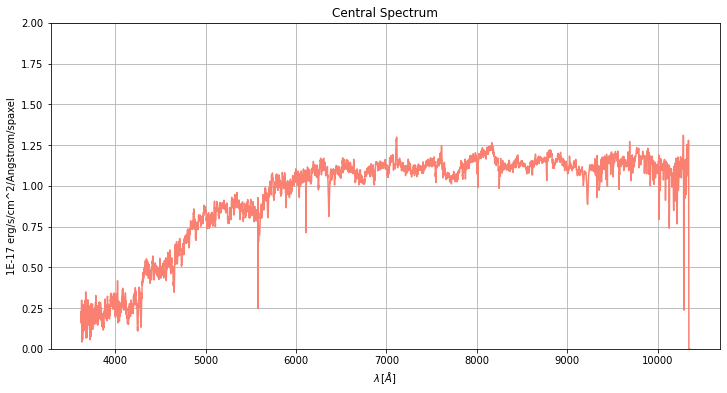

In [39]:
flux_header = data['FLUX'].header
x_center = int(flux_header['CRPIX1']) - 1
y_center = int(flux_header['CRPIX2']) - 1

print(x_center, y_center) 

plt.figure(figsize = (12, 6)) # Changing the figure size of the plot # OPTIONAL
plt.grid() # Add grid to the plot # OPTIONAL

plt.ylim(0,2)

plt.plot(wave, flux[x_center, y_center], color = 'salmon')
# You can change the color of the plot if you want. 
# Choose here : https://matplotlib.org/stable/gallery/color/named_colors.html 

plt.xlabel('$\lambda \, [\AA]$') # Put label for the x-axis

plt.ylabel(flux_header['BUNIT']) # Put label for the y-axis 

plt.title('Central Spectrum') # Put title

plt.show()

### The 2D Image

$$ 1+z = \frac{\lambda_{Obs}}{\lambda_{Rest}}$$

In [40]:
do_not_use = (mask & 2**10) != 0 # This is the mask criteria, from the MASK array in the FITS file of the object
flux_m = np.ma.array(flux, mask=do_not_use) # Masking it 

# redshift = 0.0795422 # redshift depends on the object. You can just call the redshift from above too, that you 
# found from the DRP / DAP file

# This is the H-alpha range (H-alpha wavelength = 6563 ang)
ind_wave = np.where((wave / (1 + redshift) > 6550) & (wave / (1 + redshift) < 6680))[0]
halpha = flux_m[:, :, ind_wave].sum(axis=2)
im = halpha.T

# Convert from array indices to arcsec relative to IFU center
dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
dy = flux_header['CD2_2'] * 3600.  # deg to arcsec

# extent here gives you the angle subtended by the object in the sky in arcsec
x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy

# The structure is [x_min, x_max, y_min, y_max]
extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]
print('extent =',extent)

# dim gives you the number of pixels in x and y dimensions of the object
dim = [0, len(flux), 0, len(flux)]
print('pixels =',dim)

extent = [-18.5000148, 18.5000148, -18.5000148, 18.5000148]
pixels = [0, 74, 0, 74]


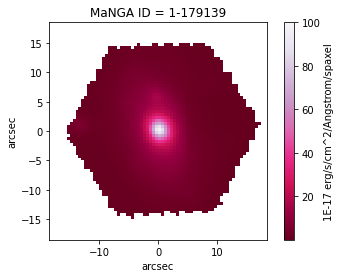

In [41]:
# You can change the size if you want. Use figsize like above
# Change the color of the image (cmap) : https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
plt.imshow(im, extent=extent, cmap=cm.PuRd_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
plt.colorbar(label=flux_header['BUNIT'])
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.title(f'MaNGA ID = {mangaid}') # I used f in front of string to format it using the mangaid variable
plt.show()

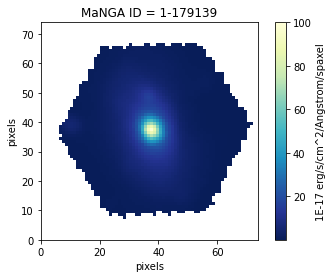

In [42]:
plt.imshow(im, extent=dim, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
plt.colorbar(label=flux_header['BUNIT'])
plt.xlabel('pixels')
plt.ylabel('pixels')
plt.title(f'MaNGA ID = {mangaid}')
plt.show()

### The Full Spectrum

In [43]:
# sum flux density values element wise to get total flux density

n = len(flux) # to get the x and the y dimension. They are equal so I can use the same n for both times
sumflux = np.zeros(4563) # make empty array to collect the value. Sumflux is an array of 4563 zeros. I will add 
# the flux density into it
    
for i in range(n): # double for-loop to loop the x and the y direction 
    for j in range(n):
        flux[i,j] = flux[i,j] * ~do_not_use[i,j] # masking the bad pixels. I explained this part last time already
        # but if you are still confused lmk
        
        # add the masked flux density element-wise to the sumflux array. 
        sumflux = np.add(sumflux, flux[i,j])
        

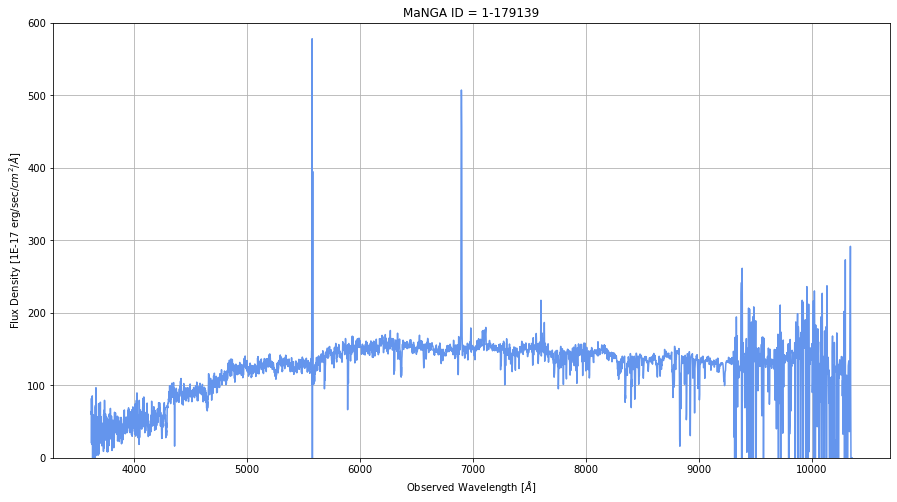

In [44]:
plt.figure(figsize = (15,8))
plt.grid()

# Setting the limit for x and y axis to sort of zoom the object. You can try playing with this 
# plt.xlim(7000,8000)

plt.ylim(0, 600) # I'm limiting the flux density to above 0 only

plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title(f'MaNGA ID = {mangaid}')

plt.plot(wave, sumflux, color = 'cornflowerblue')

# If you wanna save the figure, you can use this format
# plt.savefig('path_and_name_of_file_(your_choice)', bbox_inches = 'tight')

If you want to plot the flux density spectrum against the rest frame wavelength, divide the wave file by (1+z)

In [45]:
rest_wave = wave / (1+redshift)

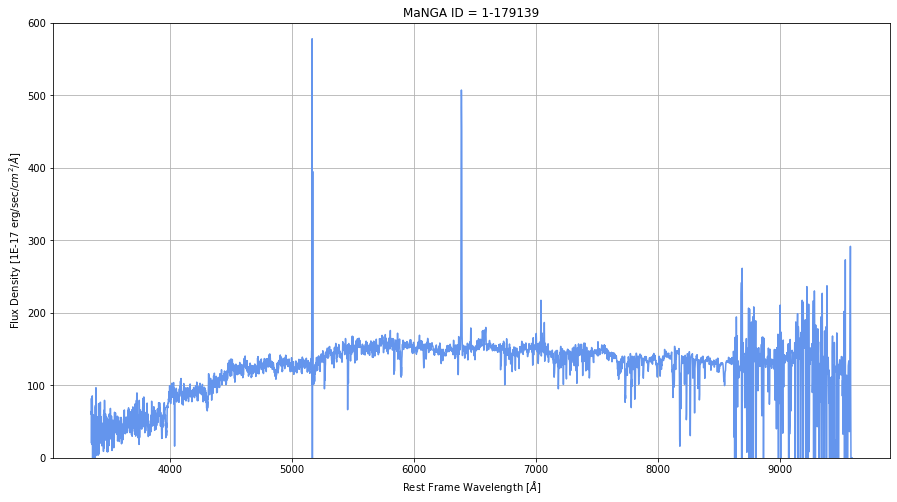

In [46]:
plt.figure(figsize = (15,8))
plt.grid()
plt.ylim(0,600)
plt.xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title(f'MaNGA ID = {mangaid}')
plt.plot(rest_wave, sumflux, color = 'cornflowerblue')

# Emission line

The emission lines used for the graphs below are from the paper aj asked you to read on slack na. I'm not sure which lines you need to use

In [47]:
# You can see the wavelength and the corresponding line by running the code here
dap[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2021-02-26'         / UTC date created                               
VERSDRP3= 'v3_1_1  '           / DRP version                                    
VERSDAP = '3.1.0   '           / DAP version                                    
ELS01   = 'OIId-3728'          / Summed emission-line element                   
ELS02   = 'OII-3729'           / Summed emission-line element                   
ELS03   = 'H12-3751'           / Summed emission-line element                   
ELS04   = 'H11-3771'           / Summed emission-line element                   
ELS05   = 'Hthe-3798'          / Summed emission-line element                   
ELS06   = 'Heta-3836'       

### [NII] - 6584

In [48]:
wavelength = 6584
lower_bound = 6500
upper_bound = 6650

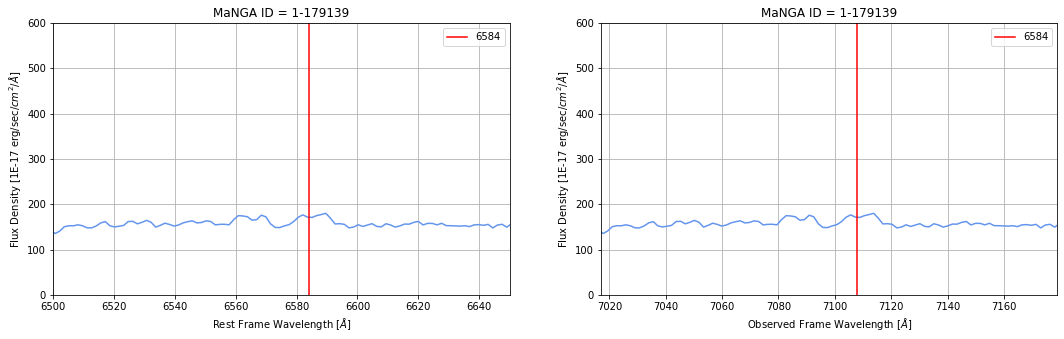

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(18)

ax1.grid()
ax1.set_ylim(0,600)
ax1.plot(rest_wave, sumflux, color = 'cornflowerblue')
ax1.set_xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
ax1.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax1.set_title(f'MaNGA ID = {mangaid}')
ax1.axvline(wavelength, label = f'{wavelength}', color = 'red')
ax1.set_xlim(lower_bound, upper_bound)
ax1.legend()

ax2.grid()
ax2.set_ylim(0,600)
ax2.plot(wave, sumflux, color = 'cornflowerblue')
ax2.set_xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
ax2.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax2.set_title(f'MaNGA ID = {mangaid}')
ax2.axvline(wavelength * (1 + redshift), label = f'{wavelength}', color = 'red')
ax2.set_xlim(lower_bound * (1 + redshift), upper_bound * (1 + redshift))
ax2.legend()

### H$\alpha$ - 6563

In [50]:
wavelength = 6563
lower_bound = 6500
upper_bound = 6600

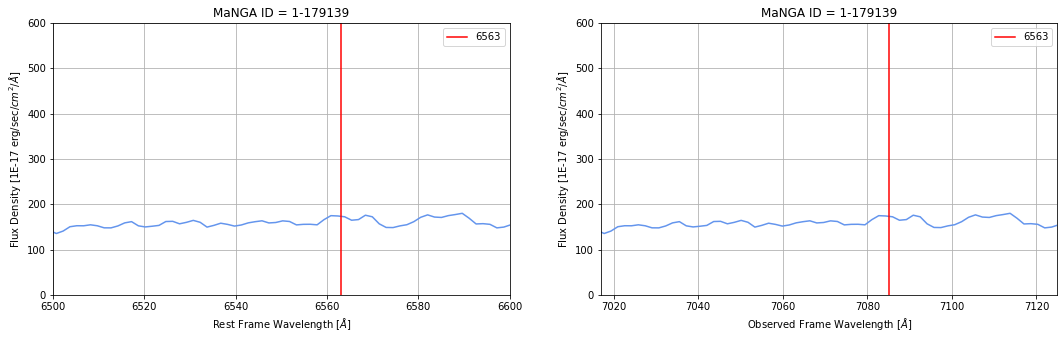

In [51]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(18)

ax1.grid()
ax1.set_ylim(0,600)
ax1.plot(rest_wave, sumflux, color = 'cornflowerblue')
ax1.set_xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
ax1.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax1.set_title(f'MaNGA ID = {mangaid}')
ax1.axvline(wavelength, label = f'{wavelength}', color = 'red')
ax1.set_xlim(lower_bound, upper_bound)
ax1.legend()

ax2.grid()
ax2.set_ylim(0,600)
ax2.plot(wave, sumflux, color = 'cornflowerblue')
ax2.set_xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
ax2.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax2.set_title(f'MaNGA ID = {mangaid}')
ax2.axvline(wavelength * (1 + redshift), label = f'{wavelength}', color = 'red')
ax2.set_xlim(lower_bound * (1 + redshift), upper_bound * (1 + redshift))
ax2.legend()

### [OIII] - 5007

In [52]:
wavelength = 5007
lower_bound = 4900
upper_bound = 5100

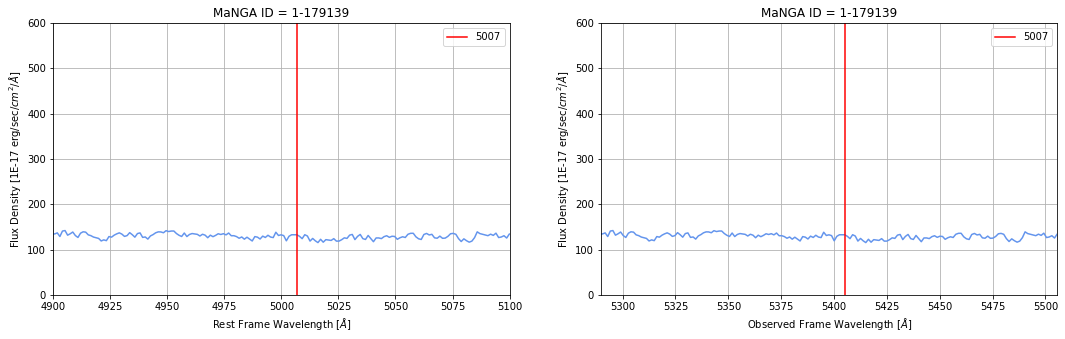

In [53]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(18)

ax1.grid()
ax1.set_ylim(0,600)
ax1.plot(rest_wave, sumflux, color = 'cornflowerblue')
ax1.set_xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
ax1.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax1.set_title(f'MaNGA ID = {mangaid}')
ax1.axvline(wavelength, label = f'{wavelength}', color = 'red')
ax1.set_xlim(lower_bound, upper_bound)
ax1.legend()

ax2.grid()
ax2.set_ylim(0,600)
ax2.plot(wave, sumflux, color = 'cornflowerblue')
ax2.set_xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
ax2.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax2.set_title(f'MaNGA ID = {mangaid}')
ax2.axvline(wavelength * (1 + redshift), label = f'{wavelength}', color = 'red')
ax2.set_xlim(lower_bound * (1 + redshift), upper_bound * (1 + redshift))
ax2.legend()

### [OIII] - 4959

In [54]:
wavelength = 4959
lower_bound = 4900
upper_bound = 5000

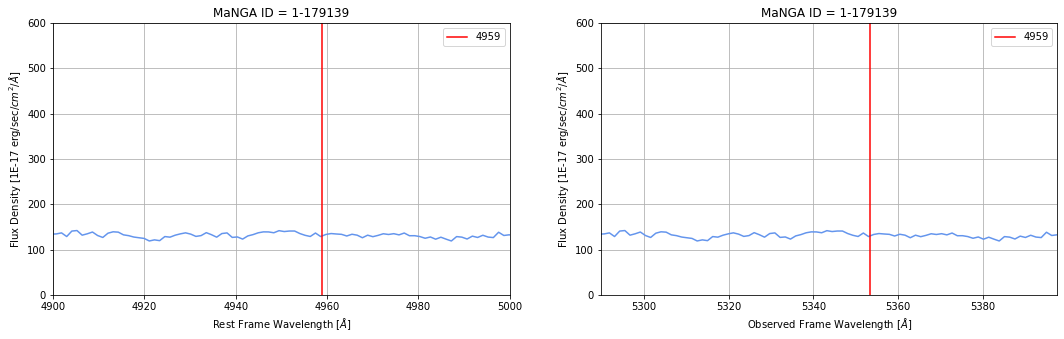

In [55]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(18)

ax1.grid()
ax1.set_ylim(0,600)
ax1.plot(rest_wave, sumflux, color = 'cornflowerblue')
ax1.set_xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
ax1.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax1.set_title(f'MaNGA ID = {mangaid}')
ax1.axvline(wavelength, label = f'{wavelength}', color = 'red')
ax1.set_xlim(lower_bound, upper_bound)
ax1.legend()

ax2.grid()
ax2.set_ylim(0,600)
ax2.plot(wave, sumflux, color = 'cornflowerblue')
ax2.set_xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
ax2.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax2.set_title(f'MaNGA ID = {mangaid}')
ax2.axvline(wavelength * (1 + redshift), label = f'{wavelength}', color = 'red')
ax2.set_xlim(lower_bound * (1 + redshift), upper_bound * (1 + redshift))
ax2.legend()

### H$\beta$ - 4861

In [56]:
wavelength = 4861
lower_bound = 4800
upper_bound = 4900

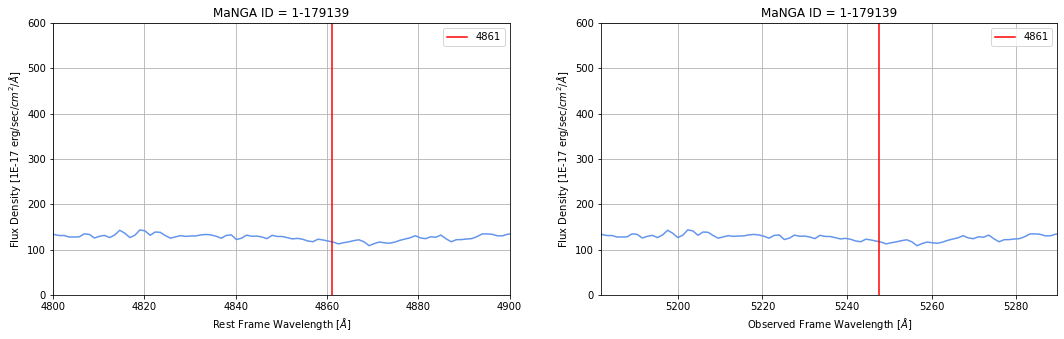

In [57]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(18)

ax1.grid()
ax1.set_ylim(0,600)
ax1.plot(rest_wave, sumflux, color = 'cornflowerblue')
ax1.set_xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
ax1.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax1.set_title(f'MaNGA ID = {mangaid}')
ax1.axvline(wavelength, label = f'{wavelength}', color = 'red')
ax1.set_xlim(lower_bound, upper_bound)
ax1.legend()

ax2.grid()
ax2.set_ylim(0,600)
ax2.plot(wave, sumflux, color = 'cornflowerblue')
ax2.set_xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
ax2.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax2.set_title(f'MaNGA ID = {mangaid}')
ax2.axvline(wavelength * (1 + redshift), label = f'{wavelength}', color = 'red')
ax2.set_xlim(lower_bound * (1 + redshift), upper_bound * (1 + redshift))
ax2.legend()

### [OIII] - 4363

In [58]:
wavelength = 4363
lower_bound = 4300
upper_bound = 4400

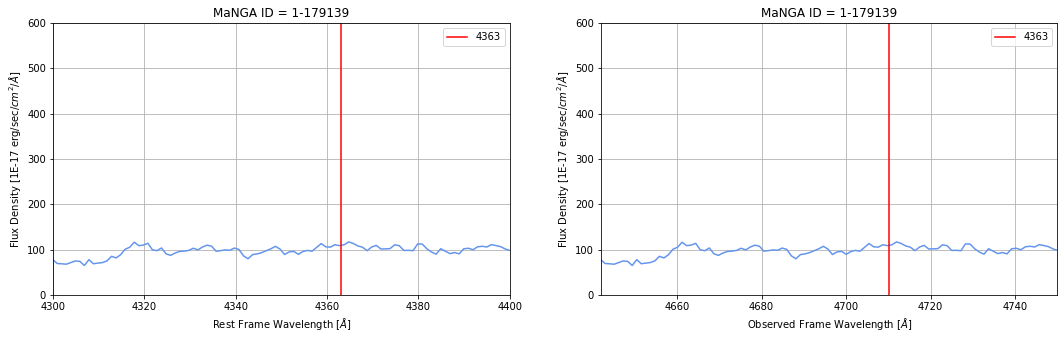

In [59]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(18)

ax1.grid()
ax1.set_ylim(0,600)
ax1.plot(rest_wave, sumflux, color = 'cornflowerblue')
ax1.set_xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
ax1.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax1.set_title(f'MaNGA ID = {mangaid}')
ax1.axvline(wavelength, label = f'{wavelength}', color = 'red')
ax1.set_xlim(lower_bound, upper_bound)
ax1.legend()

ax2.grid()
ax2.set_ylim(0,600)
ax2.plot(wave, sumflux, color = 'cornflowerblue')
ax2.set_xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
ax2.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax2.set_title(f'MaNGA ID = {mangaid}')
ax2.axvline(wavelength * (1 + redshift), label = f'{wavelength}', color = 'red')
ax2.set_xlim(lower_bound * (1 + redshift), upper_bound * (1 + redshift))
ax2.legend()

### [OII] - 3727

In [62]:
wavelength = 3727
lower_bound = 3800
upper_bound = 3650

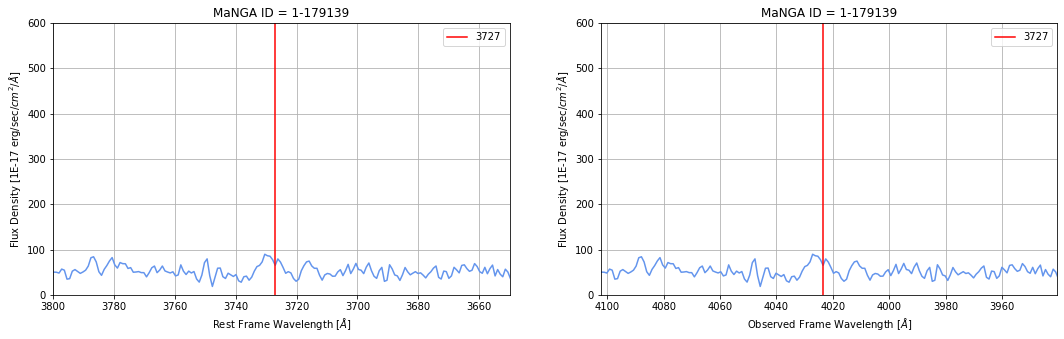

In [63]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_figheight(5)
fig.set_figwidth(18)

ax1.grid()
ax1.set_ylim(0,600)
ax1.plot(rest_wave, sumflux, color = 'cornflowerblue')
ax1.set_xlabel('Rest Frame Wavelength ' + r'[$\AA$]')
ax1.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax1.set_title(f'MaNGA ID = {mangaid}')
ax1.axvline(wavelength, label = f'{wavelength}', color = 'red')
ax1.set_xlim(lower_bound, upper_bound)
ax1.legend()

ax2.grid()
ax2.set_ylim(0,600)
ax2.plot(wave, sumflux, color = 'cornflowerblue')
ax2.set_xlabel('Observed Frame Wavelength ' + r'[$\AA$]')
ax2.set_ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
ax2.set_title(f'MaNGA ID = {mangaid}')
ax2.axvline(wavelength * (1 + redshift), label = f'{wavelength}', color = 'red')
ax2.set_xlim(lower_bound * (1 + redshift), upper_bound * (1 + redshift))
ax2.legend()